# 0.0 Imports

In [1]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px
import re
import inflection
import folium

from haversine import haversine
from IPython.core.display import HTML
from matplotlib           import pyplot as plt

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading data

In [4]:
# Lendo do Arquivo
df = pd.read_csv( '../datasets/train.csv' )

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# 1.0 Data Description

In [6]:
df1 = df.copy()

# 1.1 Rename Columns

In [7]:
old_cols = ['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)']

snake_case = lambda x: inflection.underscore(x)

new_cols = list( map(snake_case, old_cols))
df1.columns = new_cols

## 1.2 Data Dimension

In [8]:
df1.shape

(45593, 20)

## 1.3 Data Types

In [9]:
df1.dtypes

id                              object
delivery_person_id              object
delivery_person_age             object
delivery_person_ratings         object
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
order_date                      object
time_orderd                     object
time_order_picked               object
weatherconditions               object
road_traffic_density            object
vehicle_condition                int64
type_of_order                   object
type_of_vehicle                 object
multiple_deliveries             object
festival                        object
city                            object
time_taken(min)                 object
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weatherconditions              0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
time_taken(min)                0
dtype: int64

## 1.5 Fillout NA

- Não há valores nulos no dataset

## 1.6 Change Types

In [11]:
# Excluir as linhas com a idade dos entregadores vazia
# ( Conceitos de seleção condicional )
linhas_vazias = df1['delivery_person_age'] != 'NaN '
df1 = df1.loc[linhas_vazias, :]

# Conversao de texto/categoria/string para numeros inteiros
df1['delivery_person_age'] = df1['delivery_person_age'].astype( int )

# Conversao de texto/categoria/strings para numeros decimais
df1['delivery_person_ratings'] = df1['delivery_person_ratings'].astype( float )

# Conversao de texto para data
df1['order_date'] = pd.to_datetime( df1['order_date'], format='%d-%m-%Y' )
#
linhas_vazias = df1['multiple_deliveries'] != 'NaN '
df1 = df1.loc[linhas_vazias, :]
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype( int )

### 1.6.1 Changing columns format

In [12]:
df1['time_taken(min)'] = df1['time_taken(min)'].apply(lambda x: x.split('(min) ')[1])
df1['time_taken(min)'] = df1['time_taken(min)'].astype(int)

# 2.0 A visão: Empresa

In [13]:
df2 = df1.copy()

## 2.1 Quantidade de pedidos por dia

Text(0.5, 1.0, 'Variação da quantidade de pedidos por dia')

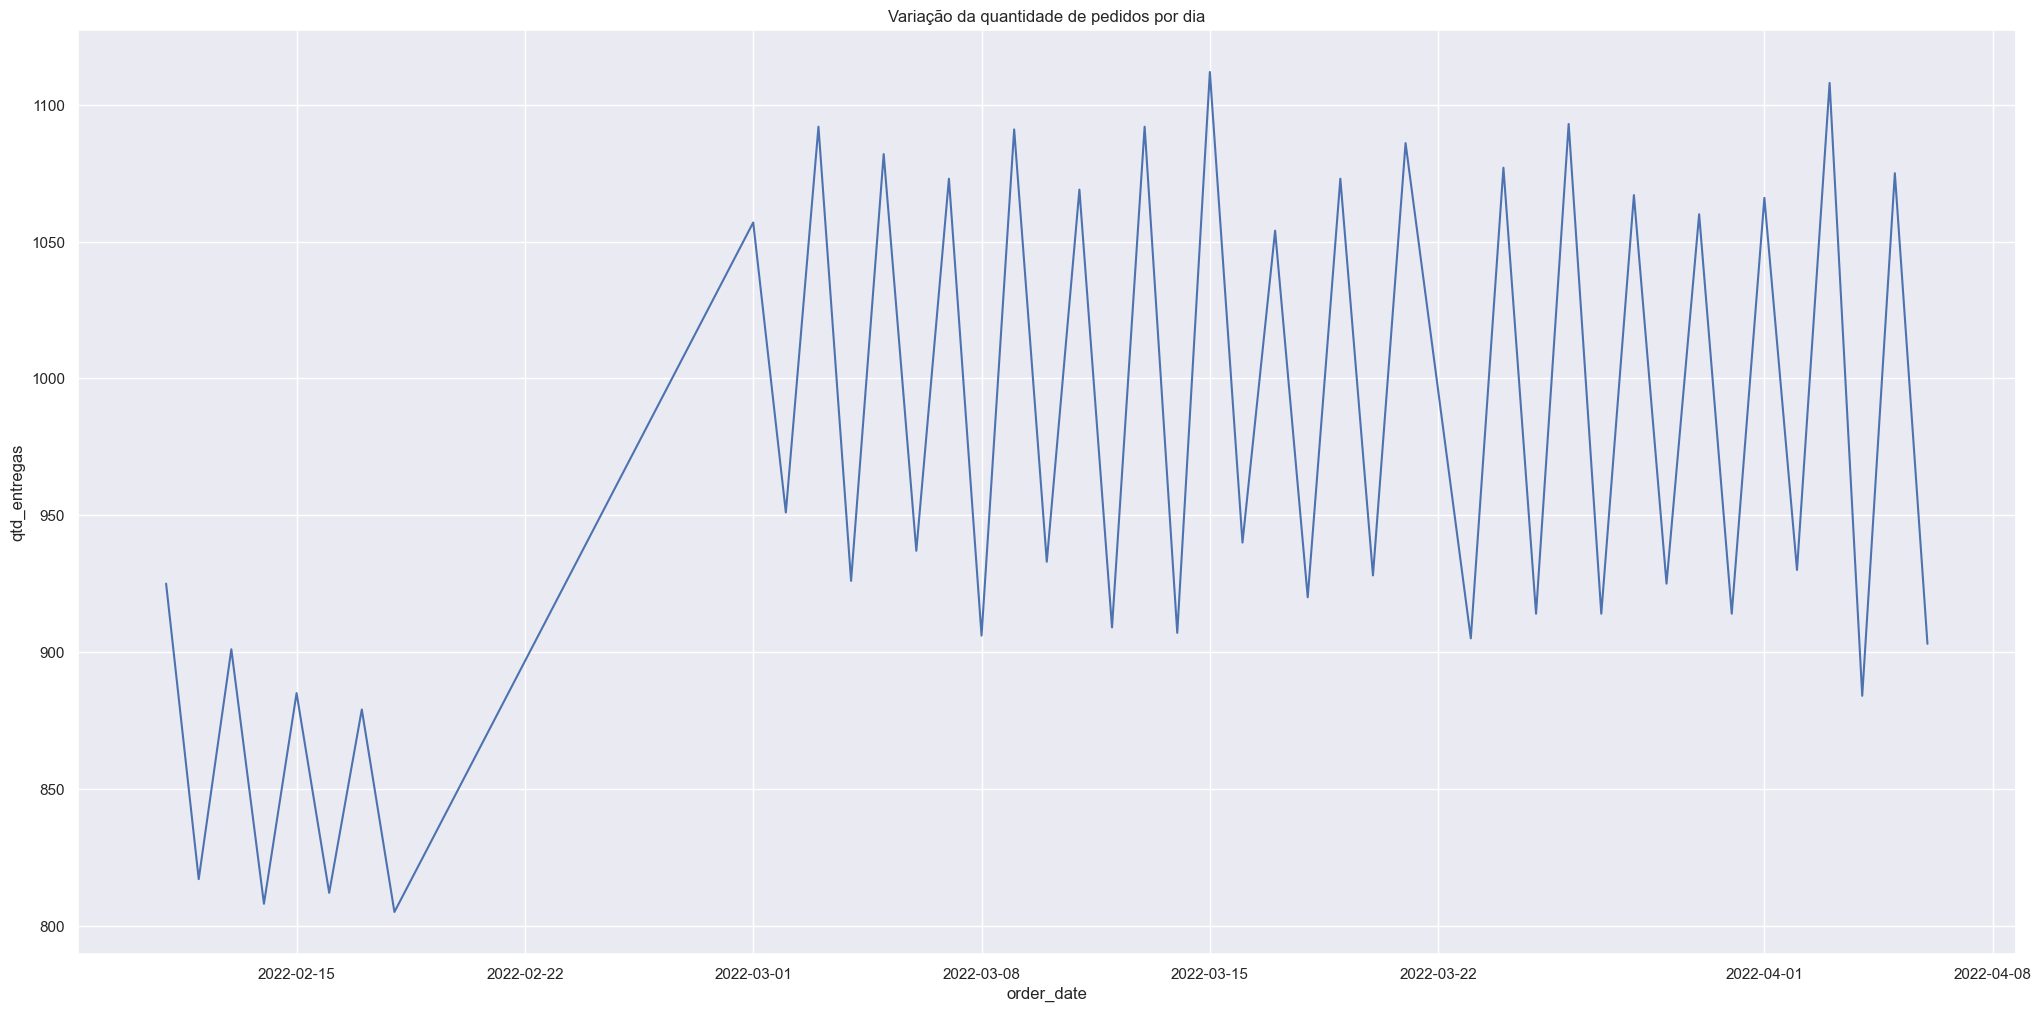

In [14]:
aux1 = df2[['id', 'order_date']].groupby( 'order_date' ).count().reset_index()
aux1.columns = ['order_date', 'qtd_entregas']
line_graph = sns.lineplot(x='order_date', y='qtd_entregas', data=aux1);
line_graph.set_title("Variação da quantidade de pedidos por dia")

## 2.2 Quantidade de pedidos por semana

Text(0.5, 1.0, 'Variação da quantidade de pedidos por semana')

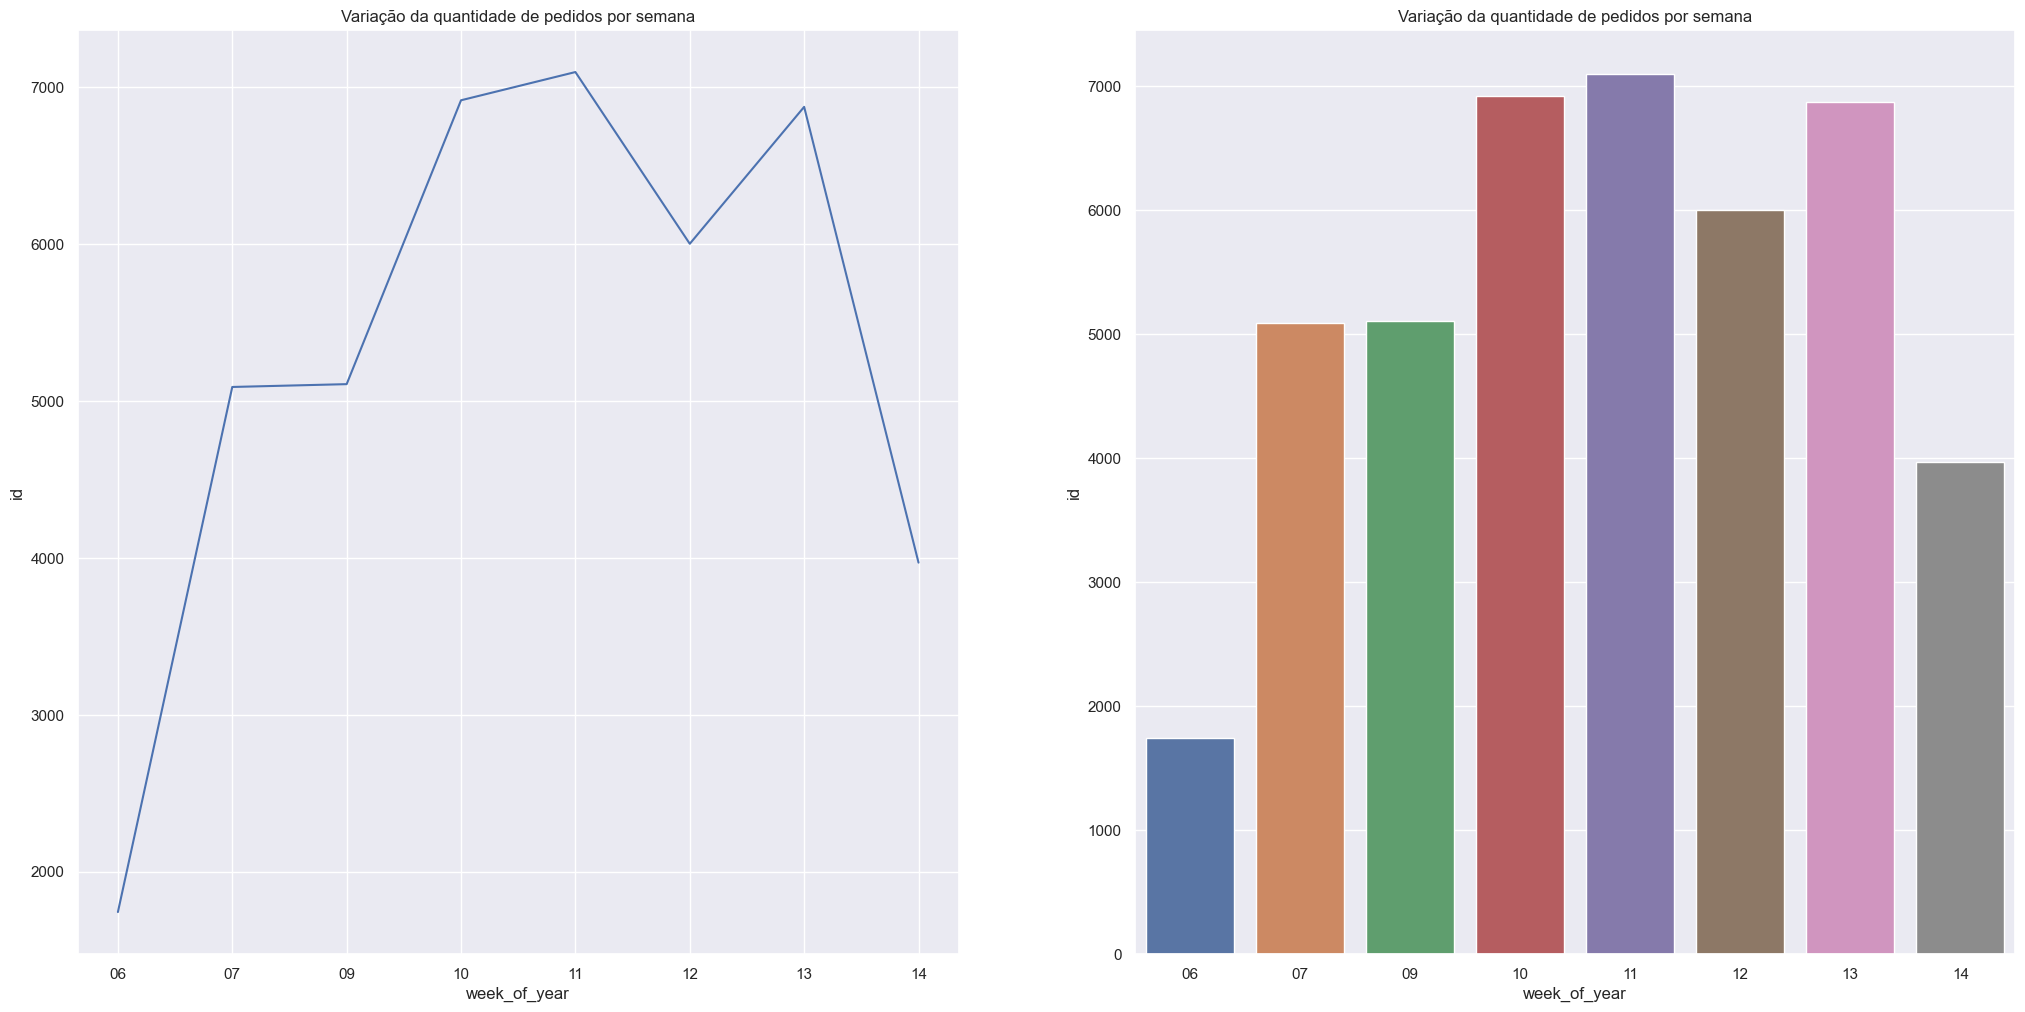

In [15]:
df2['week_of_year'] = df2['order_date'].dt.strftime('%U') 

plt.subplot(1, 2, 1)
aux1 = df2[['id', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
line_graph = sns.lineplot(x='week_of_year', y='id', data=aux1);
line_graph.set_title("Variação da quantidade de pedidos por semana")

plt.subplot(1, 2, 2)
aux1 = df2[['id', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
bar_graph = sns.barplot(x='week_of_year', y='id', data=aux1);
bar_graph.set_title("Variação da quantidade de pedidos por semana")

## 2.3 Distribuição dos pedidos por tipo de tráfego - Porcentagem

In [16]:
aux1 = df2.loc[:, ['id', 'road_traffic_density']].groupby( 'road_traffic_density' ).count().reset_index()
aux1['traffic_perc'] = ( aux1['id'] / aux1['id'].sum() ) * 100

px.pie( aux1, values='traffic_perc', names='road_traffic_density' )

## 2.4 Comparação do volume de pedidos por cidade e tipo de tráfego

In [17]:
aux2 = df2[['id', 'city','road_traffic_density']].groupby( ['city', 'road_traffic_density'] ).count().reset_index()
scatter_graph = px.scatter(aux2, x='city', y='road_traffic_density', size='id', color='city')
scatter_graph

## 2.5 A quantidade de pedidos por entregador por semana

In [ ]:
aux1 = df2[['id', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
aux2 = df2[['delivery_person_id', 'week_of_year']].groupby( 'week_of_year' ).nunique().reset_index()

aux3 = pd.merge( aux1, aux2, how='inner' )
aux3['order_by_delivery'] = aux3['id'] / aux3['delivery_person_id']

line_graph = sns.lineplot(x='week_of_year', y='order_by_delivery', data=aux3);
line_graph.set_title("Variação da quantidade de pedidos por entregador por semana")

## 2.6 A localização central de cada cidade por tipo de tráfego

In [18]:
data_plot = df2.loc[:, ['city', 'road_traffic_density', 'delivery_location_latitude', 'delivery_location_longitude']].groupby( ['city', 'road_traffic_density'] ).median().reset_index()

map_ = folium.Map( zoom_start=11 )
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['delivery_location_latitude'], location_info['delivery_location_longitude']] ).add_to(map_)
                    
map_

# 3.0 A visão: Entregadores

In [19]:
df3 = df2.copy()

Perguntas de negócio

- 1. A menor e maior idade dos entregadores.
- 2. A pior e a melhor condição de veículos.
- 3. A avaliação média por entregador.
- 4. A avaliação média e o desvio padrão por tipo de tráfego.
- 5. A avaliação média e o desvio padrão por condições climáticas.
- 6. Os 10 entregadores mais rápidos por cidade.
- 7. Os 10 entregadores mais lentos por cidade

## 3.1 A menor e maior idade dos entregadores

In [20]:
max_age = df3['delivery_person_age'].max()
min_age = df3['delivery_person_age'].min()

print(f'A maior idade dos entregadores é {max_age}, emquanto que a menor é {min_age}')

A maior idade dos entregadores é 50, emquanto que a menor é 15


## 3.2 A pior e a melhor condição de veículos

In [21]:
max_cond = df3['vehicle_condition'].max()
min_cond = df3['vehicle_condition'].min()

print(f'A melhor condição de veículo é {max_cond}, emquanto que a menor é {min_cond}')

A melhor condição de veículo é 3, emquanto que a menor é 0


## 3.3 A avaliação média por entregador

In [22]:
mean_rating = df3['delivery_person_ratings'].sum() / df3['delivery_person_ratings'].shape[0]

print(f'A avaliação média por entregador é {mean_rating}')

A avaliação média por entregador é 4.627326246933769


## 3.4 A avaliação média e o desvio padrão por tipo de tráfego

In [23]:
aux_rate = df3[['delivery_person_ratings', 'road_traffic_density']].groupby( 'road_traffic_density' ).agg({'delivery_person_ratings' : ['mean', 'std' ]})
aux_rate.columns = ['delivery_mean', 'delivery_std']
aux_rate.reset_index()

,road_traffic_density,delivery_mean,delivery_std
0,High,4.653492,0.272312
1,Jam,4.595395,0.328749
2,Low,4.646780,0.335426
3,Medium,4.660627,0.273472
4,NaN,3.912088,2.479464


## 3.5 A avaliação média e o desvio padrão por condição climática 

In [24]:
aux_cond = df3[['delivery_person_ratings', 'weatherconditions']].groupby( 'weatherconditions' ).agg({'delivery_person_ratings' : ['mean', 'std' ]})
aux_cond.columns = ['delivery_mean', 'delivery_std']
aux_cond.reset_index()

,weatherconditions,delivery_mean,delivery_std
0,conditions Cloudy,4.652190,0.280269
1,conditions Fog,4.653549,0.273893
2,conditions NaN,3.912088,2.479464
3,conditions Sandstorms,4.613000,0.309512
4,conditions Stormy,4.613369,0.311624
5,conditions Sunny,4.658030,0.393090
6,conditions Windy,4.617804,0.303464


## 3.6 Os 10 entregadores mais rápidos por cidade.

In [35]:
aux = df3[['city', 'delivery_person_id', 'time_taken(min)']].groupby(['city', 'delivery_person_id']).min().sort_values(['time_taken(min)', 'city'], ascending=True).reset_index()

aux1 = aux.loc[aux['city'] == 'Metropolitian ', :].head(10)
aux2 = aux.loc[aux['city'] == 'Urban ', :].head(10)
aux3 = aux.loc[aux['city'] == 'Semi-Urban ', :].head(10)
aux4 = aux.loc[aux['city'] == 'NaN ', :].head(10)

top_10_fast = pd.concat([aux1, aux2, aux3, aux4]).reset_index(drop=True)
top_10_fast

,city,delivery_person_id,time_taken(min)
0,Metropolitian,AGRRES010DEL03,10
1,Metropolitian,AGRRES07DEL03,10
2,Metropolitian,AGRRES12DEL01,10
3,Metropolitian,AGRRES14DEL01,10
4,Metropolitian,AGRRES17DEL03,10
5,Metropolitian,ALHRES08DEL03,10
6,Metropolitian,ALHRES12DEL01,10
7,Metropolitian,ALHRES13DEL01,10
8,Metropolitian,ALHRES14DEL02,10
9,Metropolitian,ALHRES15DEL02,10


## 3.7 Os 10 entregadores mais lentos por cidade.

In [34]:
aux = df3[['city', 'delivery_person_id', 'time_taken(min)']].groupby(['city', 'delivery_person_id']).max().sort_values(['time_taken(min)', 'city'], ascending=False).reset_index()

aux1 = aux.loc[aux['city'] == 'Metropolitian ', :].head(10)
aux2 = aux.loc[aux['city'] == 'Urban ', :].head(10)
aux3 = aux.loc[aux['city'] == 'Semi-Urban ', :].head(10)
aux4 = aux.loc[aux['city'] == 'NaN ', :].head(10)

top_10_slow = pd.concat([aux1, aux2, aux3, aux4]).reset_index(drop=True)
top_10_slow

,city,delivery_person_id,time_taken(min)
0,Metropolitian,ALHRES010DEL01,54
1,Metropolitian,AURGRES13DEL01,54
2,Metropolitian,BANGRES02DEL01,54
3,Metropolitian,BHPRES16DEL02,54
4,Metropolitian,CHENRES02DEL02,54
5,Metropolitian,CHENRES04DEL01,54
6,Metropolitian,CHENRES07DEL03,54
7,Metropolitian,CHENRES08DEL01,54
8,Metropolitian,CHENRES13DEL02,54
9,Metropolitian,COIMBRES010DEL03,54


# 4.0 A visão: Restaurantes

In [27]:
df4 = df3.copy()

- 1. A quantidade de entregadores únicos.
- 2. A distância média dos resturantes e dos locais de entrega.
- 3. O tempo médio e o desvio padrão de entrega por cidade.
- 4. O tempo médio e o desvio padrão de entrega por cidade e tipo de pedido.
- 5. O tempo médio e o desvio padrão de entrega por cidade e tipo de tráfego.
- 6. O tempo médio de entrega durantes os Festivais.

## 4.1 A quantidade de entregadores únicos

In [28]:
qtd1 = df4['delivery_person_id'].unique()

qtd2 = len(qtd1)

print(f"Quantidade de entregadores únicos: {qtd2}")

Quantidade de entregadores únicos: 1320


## 4.2 A distância média dos resturantes e dos locais de entrega

In [33]:
cols = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

df4['distance'] = df4.loc[:, cols].apply(lambda x: haversine((x['restaurant_latitude'], x['restaurant_longitude']), (x['delivery_location_latitude'], x['delivery_location_longitude'])), axis=1)

aux_dist = df4['distance'].mean()
print(f"A distância média dos restaurantes e dos locais de entrega é de: {aux_dist} km")

A distância média dos restaurantes e dos locais de entrega é de: 38.909788410698305 km


## 4.3 O tempo médio e o desvio padrão de entrega por cidade

In [67]:
aux = df4[['time_taken(min)', 'city']].groupby('city').agg({'time_taken(min)' :  ['mean', 'std']}).reset_index()
aux.columns = ['city', 'time_mean', 'time_std']

aux

,city,time_mean,time_std
0,Metropolitian,27.373295,9.162991
1,NaN,22.093213,8.368516
2,Semi-Urban,49.710526,2.724992
3,Urban,23.093622,8.888026


## 4.4 O tempo médio e o desvio padrão de entrega por cidade e tipo de pedido

In [69]:
aux2 = df4[['type_of_order', 'time_taken(min)', 'city']].groupby(['city', 'type_of_order']).agg({'time_taken(min)' :  ['mean', 'std']}).reset_index()
aux2.columns = ['city', 'type_of_order', 'time_mean', 'time_std']

aux2

,city,type_of_order,time_mean,time_std
0,Metropolitian,Buffet,27.258509,9.181257
1,Metropolitian,Drinks,27.267952,9.068615
2,Metropolitian,Meal,27.545644,9.250705
3,Metropolitian,Snack,27.415601,9.147171
4,NaN,Buffet,22.222997,8.338496
5,NaN,Drinks,21.675573,7.893793
6,NaN,Meal,21.786290,8.247113
7,NaN,Snack,22.574675,8.882381
8,Semi-Urban,Buffet,49.707317,2.731702
9,Semi-Urban,Drinks,49.625000,2.459347


## 4.5 O tempo médio e o desvio padrão de entrega por cidade e tipo de tráfego.

In [70]:
aux3 = df4[['road_traffic_density', 'time_taken(min)', 'city']].groupby(['city', 'road_traffic_density']).agg({'time_taken(min)' :  ['mean', 'std']}).reset_index()
aux3.columns = ['city', 'road_traffic_density', 'time_mean', 'time_std']

aux3

,city,road_traffic_density,time_mean,time_std
0,Metropolitian,High,28.103888,7.935947
1,Metropolitian,Jam,31.937908,9.509890
2,Metropolitian,Low,22.193973,6.827415
3,Metropolitian,Medium,27.694076,8.332809
4,Metropolitian,NaN,26.156250,8.227362
5,NaN,High,23.419355,8.454896
6,NaN,Jam,25.549451,9.536999
7,NaN,Low,19.223124,6.240026
8,NaN,Medium,23.561475,8.790679
9,NaN,NaN,17.000000,0.000000


## 4.6 O tempo médio de entrega durantes os Festivais

In [83]:
aux_fest = df4.loc[df1['festival'] == 'Yes ' , :].groupby(['festival']).agg({'time_taken(min)' :  'mean'})
aux_fest.columns = ['time_mean']

aux_fest.reset_index()

,festival,time_mean
0,Yes,45.489387
